## What does an objective function look like ?

First, we import the necessary dependencies...

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri

import numpy as np
import scipy

# We fix the random seed to always get the same problem

np.random.seed(seed=42)

# A simple problem : A straigh line fitting

We will fit a first order polynomial function. So the forward model is:

In [2]:
def forward_model(x,a,b):
    return a + x*b

Let's generate fake data

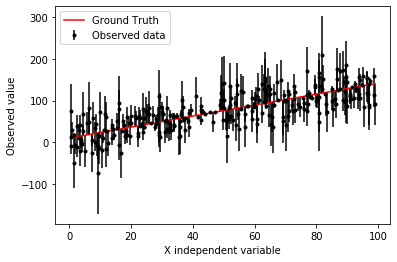

In [3]:
# true parameters
a = 10.0
b = 1.321

N = 300

x = np.sort(100*np.random.rand(N))
y = forward_model(x,a,b)

# Real world observations are noisy...
# we have random errors there, no systematic bias
ese = 30*np.random.randn(N)

y_observed = y + ese

plt.figure()
plt.errorbar(x,y_observed,yerr=ese,fmt='.',color="k",label="Observed data")
plt.plot(x,y,"r-",label="Ground Truth")
plt.xlabel("X independent variable")
plt.ylabel("Observed value")
plt.legend(loc=2)

# How does the objective function space look like ?

We have two objective functions we can choose to solve this problem, the least-square (LS) function

$misfit = \sum_{i=1}^{n}{(d_n-m_n)^2}$ , eq. 1

and the least absolute deviation (LAD) function

$misfit = \sum_{i=1}^{n}{|(d_n-m_n)|}$ . eq. 2

Let's code them in Python.

In [4]:
def least_squares(y_observed,y_calculated):
    return np.sum((y_observed-y_calculated)**2)

def least_absolute_deviation(y_observed,y_calculated):
    return np.sum(np.abs(y_observed-y_calculated))

Now we can make a bunch of code to generate different values of the parameters a and b, and look at the values of both functions.

First, let's just make one parameter (e.g. a) vary :

In [5]:
# we generate num values of a
a_variation = np.linspace(5,20,num=200)

# and we calculate the objective function for each value, fixing b to it's true value.
LS_OF = np.zeros(a_variation.shape) # we create a variable to store the least-square objective function values
LAD_OF = np.zeros(a_variation.shape) # same for LAD
for i in range(len(a_variation)):
    y_calculated = forward_model(x,a_variation[i],b)
    LS_OF[i] = least_squares(y_observed,y_calculated)
    LAD_OF[i] = least_absolute_deviation(y_observed,y_calculated)
    

and we plot the result.

*note that we scale the criterions to their sum, as their are not varying on the same scale. This is just for representation purposes.*

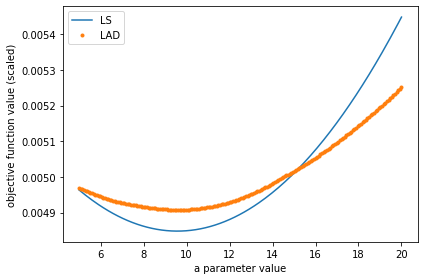

In [6]:
plt.figure()
plt.plot(a_variation, LS_OF/np.sum(LS_OF),label="LS")
plt.plot(a_variation, LAD_OF/np.sum(LAD_OF),".",label="LAD")
plt.legend()
plt.xlabel("a parameter value")
plt.ylabel("objective function value (scaled)")
plt.tight_layout()

# Experiment : 

    - change the number of data points. What happens ?
    - change the scale of the errors. What happens ?
    - include errors in the objective functions. What happens ?
    
What can you say, given your experiments, regarding the shift visible above from the true a value ?